<a href="https://colab.research.google.com/github/ferbator/data-engineering/blob/main/M33071_%D0%9A%D0%B0%D1%80%D0%B5%D0%BF%D0%B8%D0%BD_%22lab7_1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.rand(3, 4, dtype = torch.float)
b = torch.rand(12, dtype = torch.float)
c = b.reshape(2, 2, 3)

In [ ]:
print(a[:,0])

tensor([0.2899, 0.0243, 0.6897])


### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand(5, 2, dtype = torch.float)
b = torch.rand(1, 10, dtype = torch.float)
c = b.reshape(5, 2)

In [ ]:
#a + c
a.add(c)

tensor([[1.4082, 0.5387],
        [1.0726, 1.0289],
        [0.6480, 1.0069],
        [0.2520, 0.3981],
        [1.4938, 0.0988]])

In [ ]:
#a - c
a.sub(c)

tensor([[ 0.0169,  0.5363],
        [-0.2641, -0.6136],
        [-0.1892, -0.7240],
        [ 0.0171,  0.1180],
        [ 0.4944,  0.0613]])

In [ ]:
#a * c
a.mul(c)

tensor([[0.4957, 0.0006],
        [0.2702, 0.1705],
        [0.0960, 0.1224],
        [0.0158, 0.0361],
        [0.4967, 0.0015]])

In [ ]:
#a / c
a.div(c)

tensor([[1.0243e+00, 4.4946e+02],
        [6.0490e-01, 2.5281e-01],
        [5.4795e-01, 1.6344e-01],
        [1.1454e+00, 1.8422e+00],
        [1.9894e+00, 4.2761e+00]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

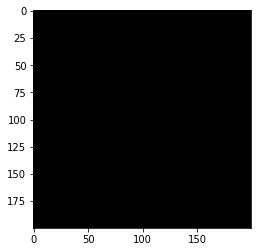

In [ ]:
images = torch.LongTensor(100,200,200,3).zero_()
plt.imshow(images[0])

In [ ]:
for i in range(100):
  for x in range(200):
      if ((x == 2*i)):
        images[i][x].fill_(255)
        images[i][x+1].fill_(255)

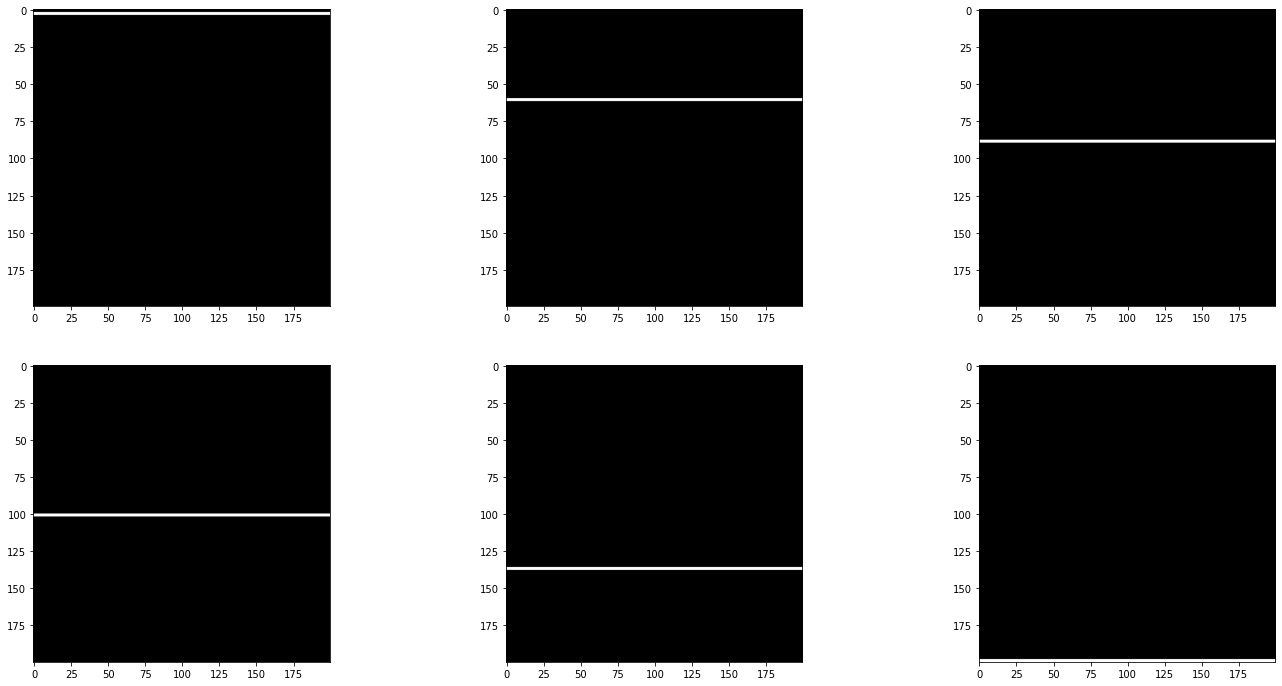

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for i, n in enumerate([1, 30, 44, 50, 68, 99]):
  axes[i//3][i%3].imshow(images[n])

3). Посчитайте среднее тензора images по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью pyplot, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью .float(), при отрисовке обратно к int с помощью .int())

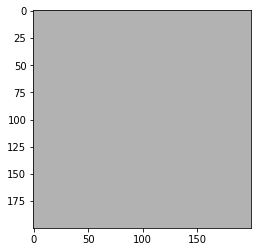

In [ ]:
# Недостающее задание
mean_tensor = images.float().mean(axis=0)
mean_tensor = mean_tensor.mul(70)
plt.imshow(mean_tensor.int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
device = torch.device("cuda")

a = torch.FloatTensor(2, 3, 4).uniform_()
a = a.cuda()

b = torch.FloatTensor(1, 8, 3).uniform_()
b = b.cuda()

c = b.reshape(2, 3, 4)

a = a.cpu()
c = c.cpu()

In [ ]:
from torch.autograd import Variable

a = Variable(a, requires_grad=False)
c = Variable(c, requires_grad=True)

L = torch.mean((c - a) ** 2)
L.backward()
c.grad

tensor([[[ 0.0436, -0.0524, -0.0276,  0.0176],
         [-0.0050,  0.0114,  0.0444,  0.0454],
         [-0.0267, -0.0426, -0.0064, -0.0004]],

        [[ 0.0462,  0.0007,  0.0344, -0.0163],
         [-0.0077,  0.0088,  0.0252,  0.0039],
         [ 0.0055, -0.0132,  0.0683,  0.0458]]])